In [1]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow==2.0.0-alpha0 
        !pip install tfp-nightly==0.7.0-dev20190511
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  True


In [3]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

plt.style.use('default') 
%matplotlib inline

tfd = tfp.distributions
print("TFB Version", tfp.__version__)
print("TF  Version",tf.__version__)

TFB Version 0.7.0-dev20190511
TF  Version 2.0.0-alpha0


In [0]:
obs_data=np.repeat(1,3)
theta=np.arange(0.05,1,0.05)

In [36]:
### ML
est_theta_ml=sum(obs_data)/len(obs_data)
print(est_theta_ml)
sd_est_theta_ml=np.std(obs_data, ddof=1)
print(sd_est_theta_ml)


1.0
0.0


In [37]:
theta

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [0]:
dist = tfp.distributions.Bernoulli(probs=0.5)         

In [39]:
dist.prob(1.0)

<tf.Tensor: id=2083, shape=(), dtype=float32, numpy=0.5>

In [0]:
prior=1/len(theta) #uniformdist

In [41]:
np.prod(dist.prob(obs_data))#joint likelyhood

0.125

In [42]:
np.prod(dist.prob(obs_data))*prior #unnormalized posterior

0.006578947368421052

In [0]:
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))

In [44]:
import pandas as pd
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])
RES

,theta,jointlik,prior,unnorm_post,post
0,0.05,0.000125,0.052632,0.000007,0.000028
1,0.10,0.001000,0.052632,0.000053,0.000222
2,0.15,0.003375,0.052632,0.000178,0.000748
3,0.20,0.008000,0.052632,0.000421,0.001773
4,0.25,0.015625,0.052632,0.000822,0.003463
5,0.30,0.027000,0.052632,0.001421,0.005983
6,0.35,0.042875,0.052632,0.002257,0.009501
7,0.40,0.064000,0.052632,0.003368,0.014183
8,0.45,0.091125,0.052632,0.004796,0.020194
9,0.50,0.125000,0.052632,0.006579,0.027701


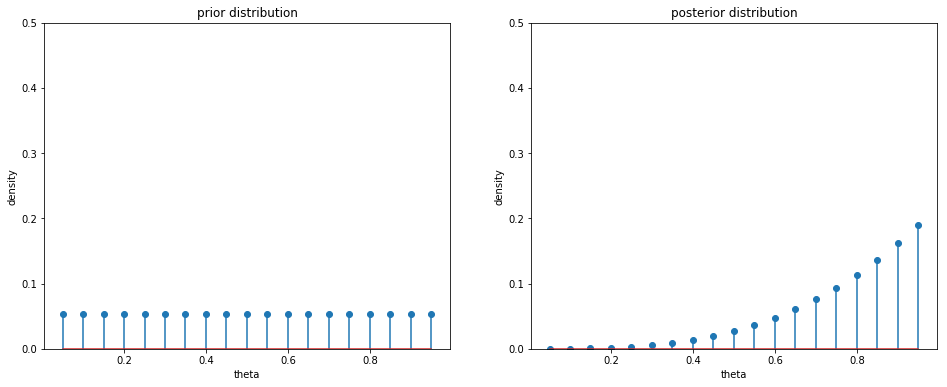

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["prior"])
plt.xlabel("theta")
plt.ylabel("density")
plt.ylim([0,0.5])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,0.5])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.show()

In [46]:
np.sum((1-RES["theta"])*RES["post"]) # genährtes integral für teta-1


0.22068421052631568

In [47]:
np.sum((RES["theta"])*RES["post"]) # genährtes integral

0.7793157894736843

In [52]:
np.sum((1-RES["theta"])*RES["prior"]) # genährtes integral für teta-1

0.49999999999999994

In [53]:
np.sum((RES["theta"])*RES["prior"]) # genährtes integral für teta

0.5

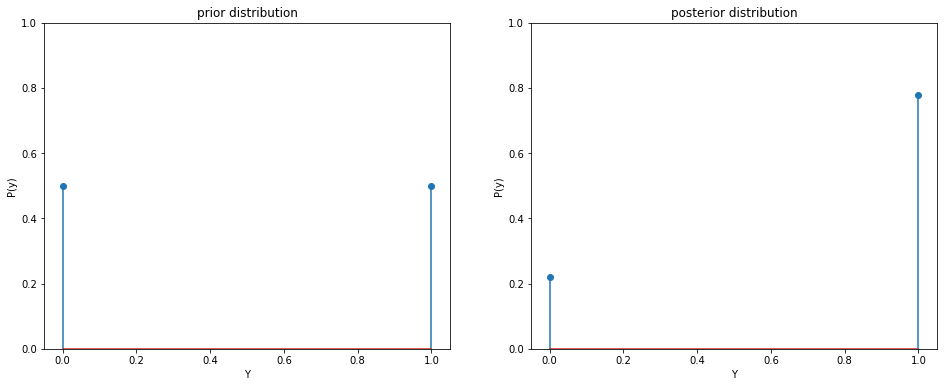

In [54]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["prior"]),np.sum((RES["theta"])*RES["prior"])])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()

In [55]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.22068421052631568, 0.7793157894736843]

### Posterior and the predictive distribution for different observed data

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

*Exercise 1: Let's assume fist you observed 20 times head and then you observed 11 times head and 9 times tail. How does the posterior and the predictive distribution look, for these two cases?*

In [0]:
# Write your code here

Scroll down to see the solution.

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

In [0]:
obs_data=np.repeat(1,20)
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  

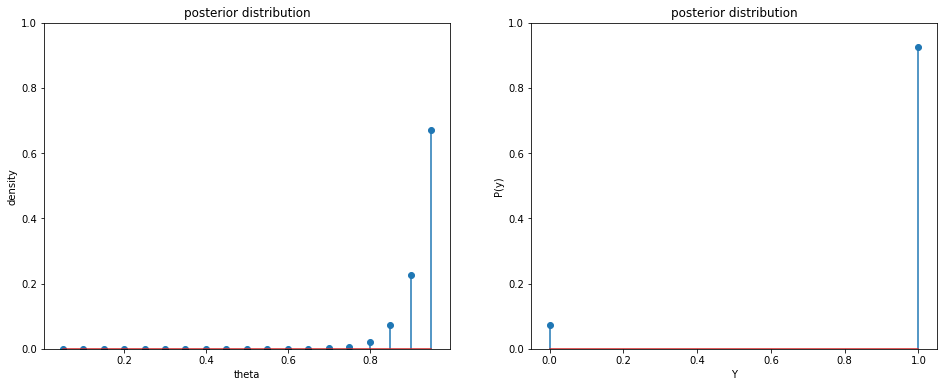

In [61]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [62]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.07354919302542323, 0.9264508069745767]

In [0]:
obs_data=np.concatenate((np.repeat(1,11),np.repeat(0,9)))
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  

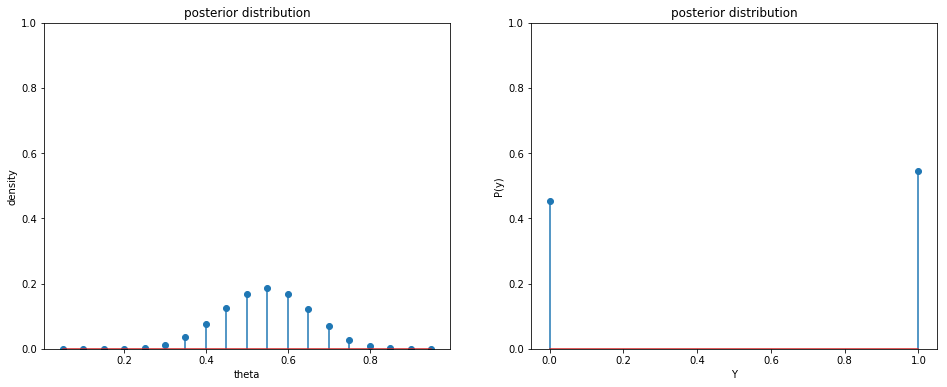

In [68]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [69]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.4545454551377407, 0.5454545448622592]